In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import LSTM, TimeDistributed
from keras.optimizers import SGD , Nadam ,Adam
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.palettes import Spectral11, colorblind, Inferno, BuGn, brewer
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource,LinearColorMapper,BasicTicker, PrintfTickFormatter, ColorBar
from sklearn.metrics import r2_score
from keras import backend as K
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
data =pd.read_csv('./7001.csv',parse_dates=["date"])
# data.set_index('date',inplace=True)

In [3]:
data.interpolate(inplace=True)

In [4]:
cols = data.columns.difference(['date'])
data[cols] = data[cols].astype(float)
data = data.resample('d', on='date').mean()

In [5]:
data.shape

(1828, 24)

In [6]:
# scaler = StandardScaler().fit(data)
# data = pd.DataFrame(scaler.transform(data))

In [7]:
data.describe()

,T2,Q2,U10,V10,PSFC,PBLH,LH,HFX,ALBEDO,SNOWC,...,NO2_chimere,O3_chimere,PM10_chimere,PM25_chimere,geop_p_500hPa,geop_p_850hPa,NO2,O3,PM10,PM25
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,...,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,11.290072,0.007119,0.713673,0.172580,97433.528346,426.751516,50.574853,23.557763,0.148140,0.020685,...,11.694144,71.487982,8.168449,5.182775,5610.955260,1476.839123,12.835541,59.126317,13.414820,11.814886
std,7.030567,0.002628,1.428776,2.695326,727.810054,185.357194,35.374083,34.635466,0.059829,0.095105,...,8.685253,14.140566,3.785942,2.752435,148.282350,72.512241,9.426638,21.228328,8.098210,8.273792
min,-10.466667,0.001329,-4.875000,-7.583333,94365.916667,41.541667,1.600000,-95.283333,0.100000,0.000000,...,1.325000,18.312500,1.733333,1.200000,5051.683333,1099.816667,0.583333,2.583333,5.002752,4.004248
25%,5.782292,0.005023,-0.270833,-1.775000,97030.270833,281.687500,19.179167,-2.323958,0.100000,0.000000,...,6.001042,63.882292,5.686458,3.550000,5510.723958,1432.444792,6.166667,44.791667,6.667730,6.020306
50%,11.141667,0.006724,0.712500,-0.054167,97463.854167,425.062500,43.725000,21.493750,0.100000,0.000000,...,9.035417,73.245833,7.533333,4.612500,5630.504167,1487.595833,10.270833,60.937500,12.219217,7.931131
75%,17.080208,0.009112,1.650000,2.037500,97891.354167,554.822917,77.862500,51.281250,0.200000,0.000000,...,13.988542,81.621875,9.742708,6.001042,5722.358333,1530.258333,16.677083,73.427083,17.034631,15.989273
max,26.479167,0.014283,6.458333,12.812500,99415.083333,1159.708333,184.729167,111.658333,0.500000,0.806275,...,56.883333,104.570833,32.583333,24.887500,5929.008333,1633.987500,64.541667,130.208333,36.996586,37.992262


In [8]:
x = data.iloc[:, :20] # 20 without date
y = data.iloc[:, 20:]
x.shape,y.shape

((1828, 20), (1828, 4))

In [59]:
x =  x.reset_index()
x['day_of_week'] = x['date'].dt.dayofweek
x['day_of_year'] = x['date'].dt.dayofyear
x.set_index('date', inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [60]:
x=pd.read_csv('X.csv')
y=pd.read_csv('y.csv')
x=x.loc[:,:'geop_p_850hPa']
del x['Unnamed: 0']
del y['Unnamed: 0']

In [61]:

x.shape

(196235, 20)

In [62]:
y.shape

(196235, 12)

In [74]:
idPlairs=np.load('idsPolair.npy')
idPlairs=idPlairs.astype(int)

In [75]:
idPlairs.sort()

In [86]:
xx=x.values

In [95]:
xx[1:100000].shape

(99999, 20)

In [103]:
for i in range(107):
    np.insert(xx[1834*i:1834*i+1834], 0, idPlairs[i], axis=1)

In [104]:
xx.shape

(0, 127)

# 1st

In [34]:
scaler = StandardScaler().fit(x)
x = pd.DataFrame(scaler.transform(x))
scaler = StandardScaler().fit(y)
y = pd.DataFrame(scaler.transform(y))

In [35]:
x,x_val, y, y_val = train_test_split(x,y, shuffle = False)

In [36]:
[x.shape, y.shape, x_val.shape, y_val.shape]

[(147176, 20), (147176, 12), (49059, 20), (49059, 12)]

AttributeError: 'numpy.ndarray' object has no attribute 'sahepe'

In [37]:
timestep = 1

In [38]:
# n_input = 2
# train_gen = TimeseriesGenerator(x[:-1], y[:-1], length=n_input, batch_size=1)
# val_gen = TimeseriesGenerator(x_val[:-1], y_val[:-1], length=n_input, batch_size=1)

In [39]:
# print('Samples: %d' % len(train_gen))
# # print each sample
# for i in range(len(train_gen)):
# 	x, y = train_gen[i]
# 	print('%s => %s' % (x, y))

In [40]:
x = x.values.reshape(int(x.shape[0]/timestep), timestep, x.shape[1])
x_val = x_val.values.reshape(int(x_val.shape[0]/timestep), timestep, x_val.shape[1])

In [41]:
y = y.values.reshape(int(y.shape[0]/timestep), 12*timestep)
y_val = y_val.values.reshape(int(y_val.shape[0]/timestep), 12*timestep)

In [42]:
batch_size = x.shape[0]
n_epochs = 100

In [43]:
model = Sequential()
# model.add(LSTM(128, input_shape=(x.shape[1],x.shape[2]) ,return_sequences=True ))
# model.add(Dropout(.1))
model.add(LSTM(128,return_sequences=True, recurrent_dropout = 0.6))
model.add(Dropout(.6))
model.add(LSTM(32,recurrent_dropout = 0.6))
model.add(Dropout(.1))
model.add(Dense(12))
sgd = Adam(lr=0.01)
model.compile(loss = 'mse', optimizer=sgd)
# model.compile(optimizer = "rmsprop", loss = 'mae')

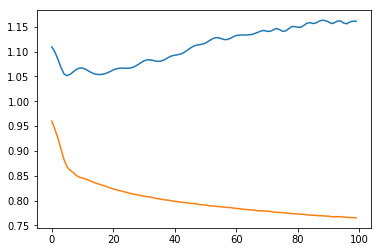

In [44]:
model.fit(x, y, batch_size = batch_size , epochs = n_epochs, verbose=0, validation_data= (x_val, y_val) )
plt.plot(model.history.history["val_loss"])
plt.plot(model.history.history["loss"])
# # history = model.fit_generator(train_gen, epochs=n_epochs).history
# model = Sequential()
# model.add(LSTM(4, input_shape=(None,timestep, 3)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit_generator(train_gen, samples_per_epoch=x.shape[0]/10, epochs=25, verbose=1, validation_data=val_gen, validation_steps=x_val.shape[0])

In [45]:
y_pred = model.predict(x_val)

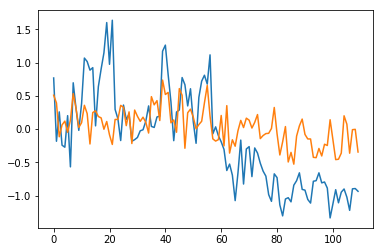

In [55]:
# plt.plot(y[:,1])
plt.plot(y_val[:110,8])
plt.plot(y_pred[:110,8])
plt.show()

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 1, 128)            77312     
_________________________________________________________________
dropout_11 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                20608     
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 97,986
Trainable params: 97,986
Non-trainable params: 0
_________________________________________________________________


In [30]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [493]:
unix = series_to_supervised(y,n_in=2).iloc[:,:-y.shape[1]]

In [336]:
yunix = y[2:]

In [339]:
x,x_val, y, y_val = train_test_split(unix,yunix, shuffle = False)

In [340]:
x = x.values.reshape(int(x.shape[0]/timestep), timestep, x.shape[1])
x_val = x_val.values.reshape(int(x_val.shape[0]/timestep), timestep, x_val.shape[1])
y = y.values.reshape(int(y.shape[0]/timestep), 4*timestep)[:,0:2]
y_val = y_val.values.reshape(int(y_val.shape[0]/timestep), 4*timestep)[:,0:2]

In [346]:
batch_size = 100
n_epochs = 100
model = Sequential()
# model.add(LSTM(128, input_shape=(x.shape[1],x.shape[2]) ,return_sequences=True ))
# model.add(Dropout(.1))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(.5))
model.add(LSTM(32))
model.add(Dense(2))
sgd = Adam(lr=0.01)
# model.compile(loss = 'mse', optimizer=sgd)
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

model.compile(optimizer = "rmsprop", loss = 'mae')

In [347]:
model.fit(x, y, batch_size = batch_size , epochs = n_epochs, verbose=1, validation_data= (x_val, y_val) )

Train on 1369 samples, validate on 457 samples
Epoch 1/100
1369/1369 [==============================] - 7s 5ms/step - loss: 0.7219 - val_loss: 0.8337
Epoch 2/100
1369/1369 [==============================] - 0s 52us/step - loss: 0.6794 - val_loss: 0.8014
Epoch 3/100
1369/1369 [==============================] - 0s 51us/step - loss: 0.6356 - val_loss: 0.7763
Epoch 4/100
1369/1369 [==============================] - 0s 50us/step - loss: 0.5988 - val_loss: 0.7615
Epoch 5/100
1369/1369 [==============================] - 0s 50us/step - loss: 0.5786 - val_loss: 0.7577
Epoch 6/100
1369/1369 [==============================] - 0s 51us/step - loss: 0.5647 - val_loss: 0.7545
Epoch 7/100
1369/1369 [==============================] - 0s 52us/step - loss: 0.5527 - val_loss: 0.7419
Epoch 8/100
1369/1369 [==============================] - 0s 50us/step - loss: 0.5468 - val_loss: 0.7366
Epoch 9/100
1369/1369 [==============================] - 0s 52us/step - loss: 0.5433 - val_loss: 0.7255
Epoch 10/100
1369/

# 3rd 

In [13]:
shift = 5
unix = series_to_supervised(y,n_in=shift).iloc[:,:-y.shape[1]]
unix.head()

,var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1)
date,,,,,,,,,,,,,,,,,,,,
2012-01-06,5.666667,41.375000,8.992190,6.981819,2.041667,59.458333,8.981270,6.973663,4.333333,61.625000,8.970351,6.965507,7.041667,62.041667,8.959431,6.957352,0.583333,68.083333,8.948512,6.949196
2012-01-07,2.041667,59.458333,8.981270,6.973663,4.333333,61.625000,8.970351,6.965507,7.041667,62.041667,8.959431,6.957352,0.583333,68.083333,8.948512,6.949196,12.333333,41.916667,8.937592,6.941040
2012-01-08,4.333333,61.625000,8.970351,6.965507,7.041667,62.041667,8.959431,6.957352,0.583333,68.083333,8.948512,6.949196,12.333333,41.916667,8.937592,6.941040,9.875000,41.291667,8.926673,6.932884
2012-01-09,7.041667,62.041667,8.959431,6.957352,0.583333,68.083333,8.948512,6.949196,12.333333,41.916667,8.937592,6.941040,9.875000,41.291667,8.926673,6.932884,4.041667,57.583333,8.915754,6.924728
2012-01-10,0.583333,68.083333,8.948512,6.949196,12.333333,41.916667,8.937592,6.941040,9.875000,41.291667,8.926673,6.932884,4.041667,57.583333,8.915754,6.924728,11.958333,44.625000,8.904834,6.916572


In [11]:
x.head()

,T2,Q2,U10,V10,PSFC,PBLH,LH,HFX,ALBEDO,SNOWC,...,DV10,PRECIP,NO2_chimere,O3_chimere,PM10_chimere,PM25_chimere,geop_p_500hPa,geop_p_850hPa,day_of_week,day_of_year
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,9.300000,0.006979,1.779167,3.237500,97692.333333,352.666667,8.379167,-24.383333,0.1,0.0,...,214.791667,0.038333,6.475000,65.708333,3.345833,2.379167,5579.633333,1444.154167,6,1
2012-01-02,6.829167,0.005842,3.120833,2.641667,97552.750000,634.750000,12.816667,-23.100000,0.1,0.0,...,238.291667,0.503333,7.875000,64.500000,2.829167,1.941667,5503.650000,1416.362500,0,2
2012-01-03,5.391667,0.004962,2.225000,3.450000,98127.750000,469.500000,18.475000,-34.100000,0.1,0.0,...,216.250000,0.044583,4.416667,71.754167,2.687500,1.629167,5515.450000,1439.154167,1,3
2012-01-04,6.125000,0.005254,3.391667,-0.154167,98213.083333,590.416667,25.666667,-20.716667,0.1,0.0,...,269.500000,0.052917,10.133333,62.920833,3.120833,2.212500,5414.558333,1405.033333,2,4
2012-01-05,6.841667,0.005633,6.458333,-0.179167,97243.500000,1096.500000,24.241667,-53.491667,0.1,0.0,...,267.041667,0.121250,2.062500,68.100000,2.054167,1.200000,5263.058333,1246.766667,3,5


In [1029]:
x = x.join(unix)[shift:]


In [1030]:
y = y[shift:]

In [1031]:
# del x['date']

In [138]:
scaler = StandardScaler().fit(x)
x = pd.DataFrame(scaler.transform(x))
scaler = StandardScaler().fit(y)
y = pd.DataFrame(scaler.transform(y))

/Users/Amine/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Amine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [139]:
data_size = int(len(x))
train_size_initial = int(data_size * 0.7)
x_samples = x

In [140]:
batch_size_div = 90
if train_size_initial < batch_size_div:
    batch_size = 1
else:
    batch_size = int(train_size_initial / batch_size_div)
train_size = int(int(train_size_initial / batch_size) * batch_size)  # provide even division of training / batches
val_size = int(int((data_size - train_size) / batch_size) * batch_size)  # provide even division of val / batches
print('Data Size: {}  Train Size: {}   Batch Size: {}'.format(data_size, train_size, batch_size))

Data Size: 43888  Train Size: 30690   Batch Size: 341


In [141]:
x, x_val = x_samples[0:train_size], x_samples[train_size:train_size + val_size]

In [142]:
x.shape, x_val.shape

((30690, 23), (12958, 23))

In [143]:
y, y_val = y.iloc[:train_size, :], y.iloc[train_size:train_size + val_size,:]

In [144]:
data

,date,T2,Q2,U10,V10,PSFC,PBLH,LH,HFX,ALBEDO,...,NO2_chimere,O3_chimere,PM10_chimere,PM25_chimere,geop_p_500hPa,geop_p_850hPa,NO2,O3,PM10,PM25
0,2012-01-01 00:00:00,8.4,0.0070,1.9,1.4,97789.0,0.0,0.0,0.0,0.1,...,11.4,39.9,5.6,5.5,5550.1,1436.4,4.0,51.0,8.997422,6.985727
1,2012-01-01 01:00:00,7.8,0.0069,1.4,1.8,97809.0,234.0,-7.8,-25.8,0.1,...,8.9,49.7,6.6,5.8,5553.3,1434.2,3.0,53.0,8.996967,6.985387
2,2012-01-01 02:00:00,8.2,0.0070,2.1,1.2,97785.0,298.0,-5.2,-25.3,0.1,...,5.7,56.5,5.4,4.5,5555.8,1434.2,10.0,39.0,8.996512,6.985048
3,2012-01-01 03:00:00,8.2,0.0070,2.8,0.8,97768.0,312.0,-5.4,-28.3,0.1,...,3.4,65.4,3.6,2.7,5560.4,1436.8,5.0,39.0,8.996057,6.984708
4,2012-01-01 04:00:00,8.5,0.0071,2.7,1.2,97751.0,304.0,-3.1,-32.1,0.1,...,2.3,69.7,2.6,1.8,5563.6,1437.5,8.0,30.0,8.995602,6.984368
5,2012-01-01 05:00:00,8.5,0.0070,2.3,1.2,97741.0,342.0,-0.1,-30.4,0.1,...,2.7,70.6,2.4,1.4,5567.7,1439.1,6.0,25.0,8.995147,6.984028
6,2012-01-01 06:00:00,8.3,0.0070,1.9,1.4,97740.0,342.0,-0.9,-25.7,0.1,...,3.3,70.2,2.4,1.4,5572.2,1438.9,9.0,25.0,8.994692,6.983688
7,2012-01-01 07:00:00,8.3,0.0070,2.0,1.8,97741.0,347.0,-1.3,-21.3,0.1,...,3.0,71.1,2.3,1.4,5576.7,1443.9,11.0,22.0,8.994237,6.983348
8,2012-01-01 08:00:00,8.4,0.0069,2.2,2.3,97769.0,339.0,-0.9,-21.8,0.1,...,4.2,68.9,2.7,1.8,5579.9,1443.7,8.0,24.0,8.993782,6.983009
9,2012-01-01 09:00:00,9.1,0.0070,2.5,2.2,97778.0,342.0,5.1,-24.4,0.1,...,5.1,65.5,3.0,2.2,5582.7,1445.2,5.0,45.0,8.993327,6.982669


In [145]:
timestep = 24
x = x.values.reshape(int(x.shape[0]/timestep), timestep, x.shape[1])
x_val = x_val.values.reshape(int(x_val.shape[0]/timestep), timestep, x_val.shape[1])
y = y.values.reshape(int(y.shape[0]/timestep), y.shape[1]*timestep)[:,0:2]
y_val = y_val.values.reshape(int(y_val.shape[0]/timestep), y_val.shape[1]*timestep)[:,0:2]
x.shape , x_val.shape, y.shape, y_val.shape

ValueError: cannot reshape array of size 705870 into shape (1278,24,23)

In [80]:
n_epochs = 50

model = Sequential()
# model.add(LSTM(128, input_shape=(x.shape[1],x.shape[2]) ,return_sequences=True ))
# model.add(Dropout(.1))
# model.add(LSTM(64,return_sequences=True,stateful = True,batch_input_shape = (batch_size, *x.shape) , name= "input_layer"))
model.add(LSTM(128,batch_input_shape=(batch_size,timestep,x.shape[2]), activation='tanh',return_sequences=True,stateful=True,recurrent_dropout=0.2, name='input_layer'))
model.add(Dropout(.6))
model.add(LSTM(32,name= "hidden_layer"))
model.add(Dropout(.1))
model.add(Dense(2,name= "output_layer"))
sgd = Adam(lr=0.05)
# model.compile(loss = 'mse', optimizer=sgd)
model.compile(optimizer = "rmsprop", loss = 'mae')

IndexError: tuple index out of range

In [61]:
model.fit(x, y, batch_size = batch_size , epochs = n_epochs, verbose=1, validation_data= (x_val, y_val) )

Train on 30690 samples, validate on 12958 samples
Epoch 1/50
30690/30690 [==============================] - 1s 24us/step - loss: 0.3164 - val_loss: 0.3360
Epoch 2/50
30690/30690 [==============================] - 1s 24us/step - loss: 0.3176 - val_loss: 0.3344
Epoch 3/50
30690/30690 [==============================] - 1s 24us/step - loss: 0.3169 - val_loss: 0.3363
Epoch 4/50
30690/30690 [==============================] - 1s 24us/step - loss: 0.3176 - val_loss: 0.3351
Epoch 5/50
30690/30690 [==============================] - 1s 23us/step - loss: 0.3164 - val_loss: 0.3359
Epoch 6/50
30690/30690 [==============================] - 1s 24us/step - loss: 0.3165 - val_loss: 0.3358
Epoch 7/50
30690/30690 [==============================] - 1s 24us/step - loss: 0.3158 - val_loss: 0.3373
Epoch 8/50
30690/30690 [==============================] - 1s 23us/step - loss: 0.3150 - val_loss: 0.3351
Epoch 9/50
30690/30690 [==============================] - 1s 24us/step - loss: 0.3141 - val_loss: 0.3378
Epoch

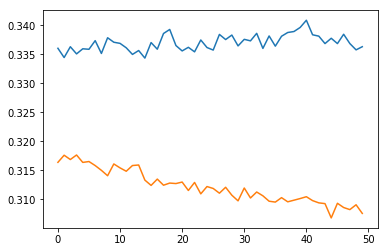

In [62]:
plt.plot(model.history.history["val_loss"])
plt.plot(model.history.history["loss"])

In [1063]:
# y_pred = model.predict(x_val)
# plt.plot(y_val[:110])
# plt.plot(y_pred[:110])
# plt.show()